# Faceting Plots with  `sns.FacetGrid()` and `.map()`

**Multiple copies of the same type of plot visualized on different subsets of the data.**


[Faceting using sns.FacetGrid()]()

In [11]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

### Example 1: Using faceting as an alternative way to violin plot.

___Context:___

Study on the distribution pattern of `comb` by each type of car.

To achieve:

- Compare violin plots and facet plots
- Resize the bins
- Parameters: `col_wrap` and `sharey`

In [13]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [15]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

**Previously we have explore the shape of the data using violin plot.**

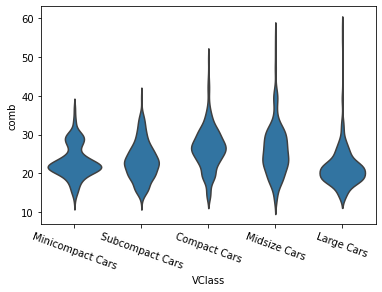

In [26]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], inner=None)
plt.xticks(rotation=-20);

**Next, use `sns.FacetGrid()` and `.map()` methods to make facet plots.**

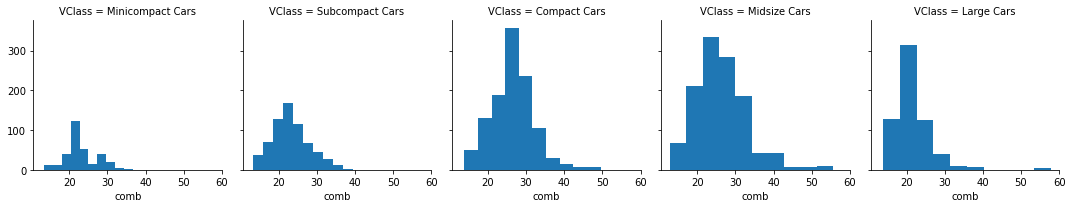

In [18]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb');

___Notice:___

If set `sharey=False`:

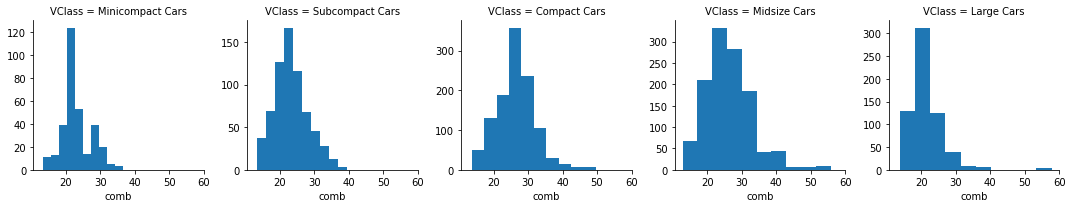

In [27]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', sharey=False)
g.map(plt.hist, 'comb');

**Furthermore, resize the bin size ...**

In [30]:
fuel_econ.groupby('VClass').comb.describe().T

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
count,321.000000,673.000000,1122.000000,1188.000000,625.000000
mean,23.152877,23.303826,26.504232,26.180177,21.519717
std,4.240233,4.871526,5.558006,6.807304,5.000261
min,13.384900,13.311700,13.780100,12.821700,13.863400
25%,20.755000,19.632500,23.131750,21.608875,18.627700
50%,22.100000,22.980100,26.494650,25.503150,20.978200
75%,25.358800,26.124600,29.878200,29.843900,22.837700
max,36.612200,39.485000,49.568500,55.700000,57.782400


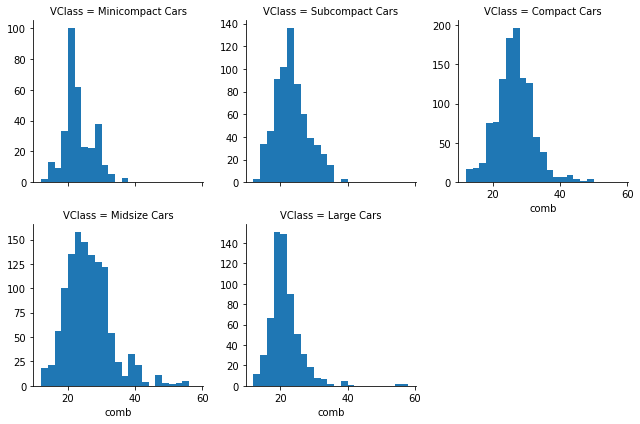

In [36]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

### Example 3: Use Facet Plots to Study on the Data Distribution of `trans`  by Car Types. 

- Use `col_wrap` parameter to control the maximum number of graph per row.
- Use `col_order` parameter to control the ordering of each facet plot.

In [37]:
# How many `trans` types are there?
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S7)                    43
Automatic (AV-S6)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


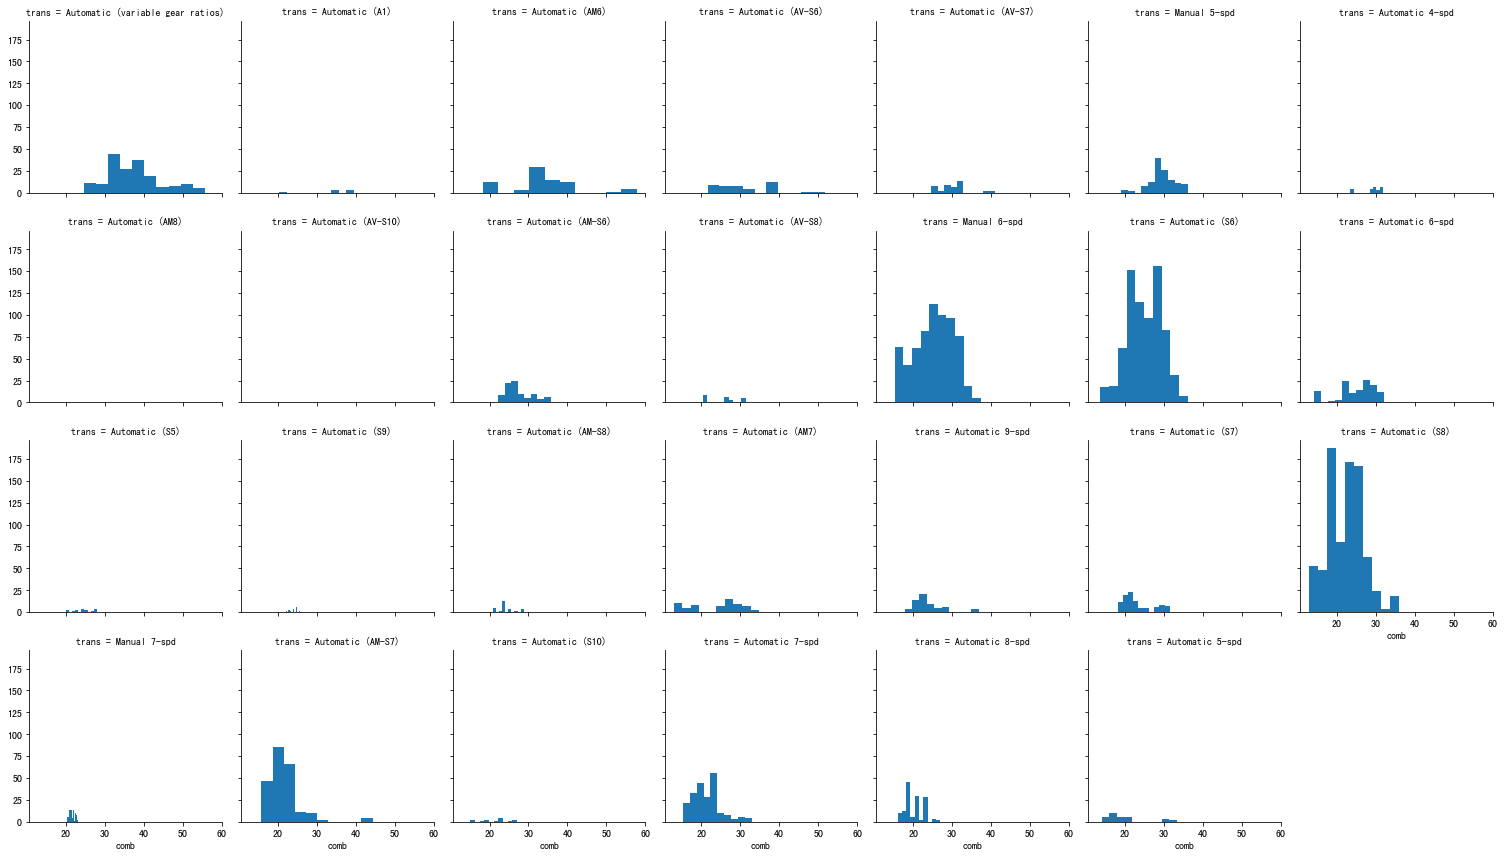

In [13]:
# Find the order in which we want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');

### 另一个实例
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.

Hint: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

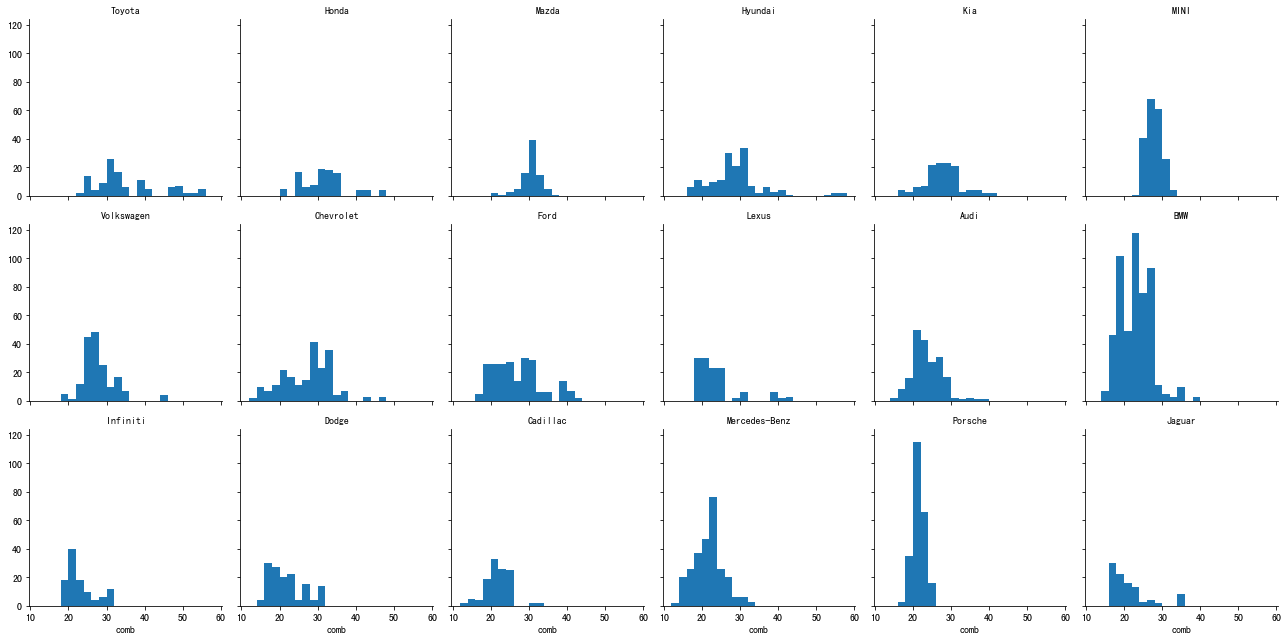

In [16]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
g = sns.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 3,
                 col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

In [20]:
make_frequency[make_frequency > THRESHOLD]

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
Audi             201
MINI             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

由于不同品牌之间的数量之间差异较大，因此考虑将频数归一化为频率

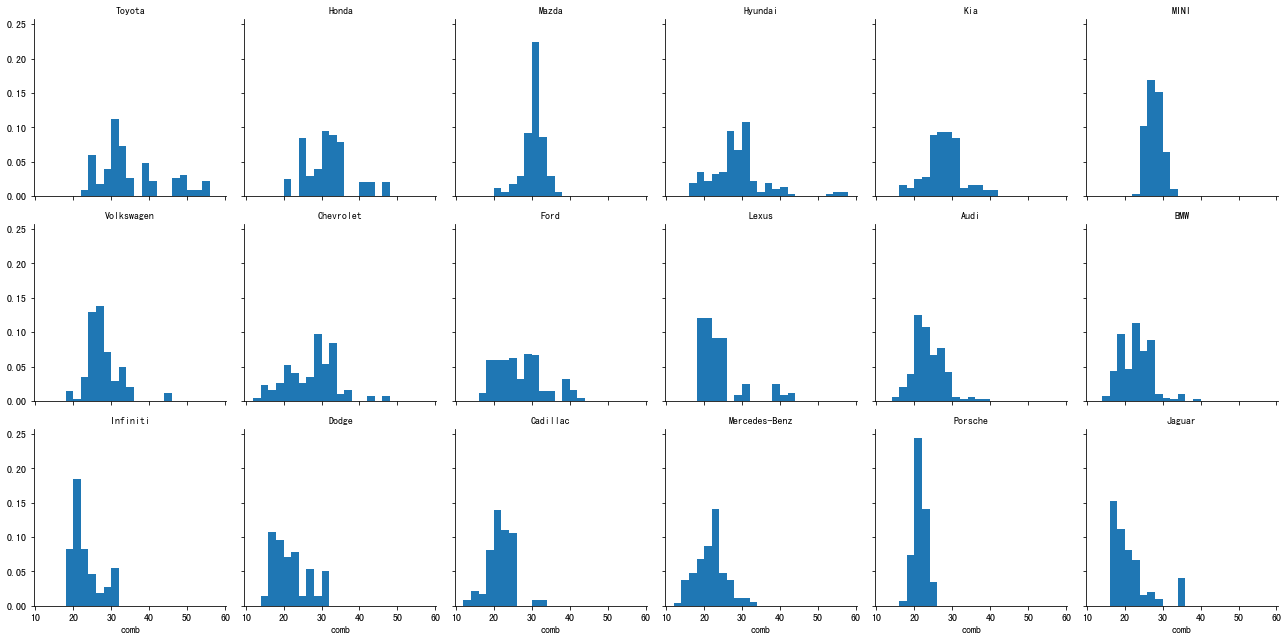

In [17]:
# 添加density=True，从而将频数归一化为频率
g = sns.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 3,
                 col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', density=True, bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

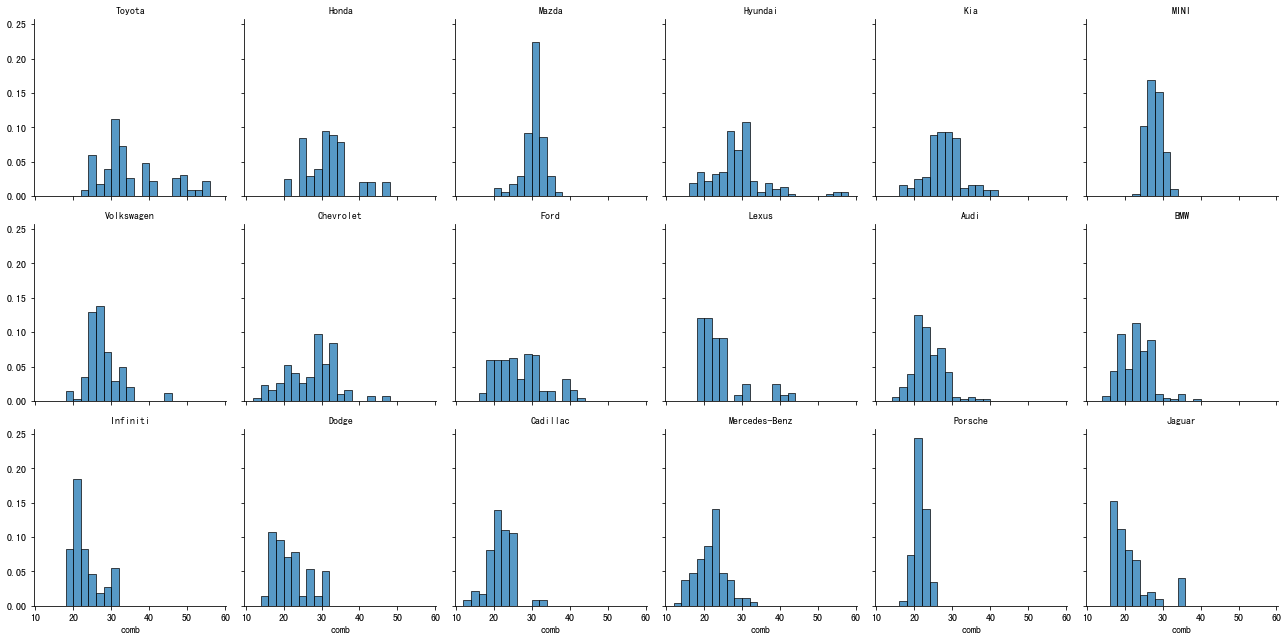

In [28]:
# 下面是通过sns.histplot方法
g = sns.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 3,
                 col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(sns.histplot, 'comb', stat='density', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

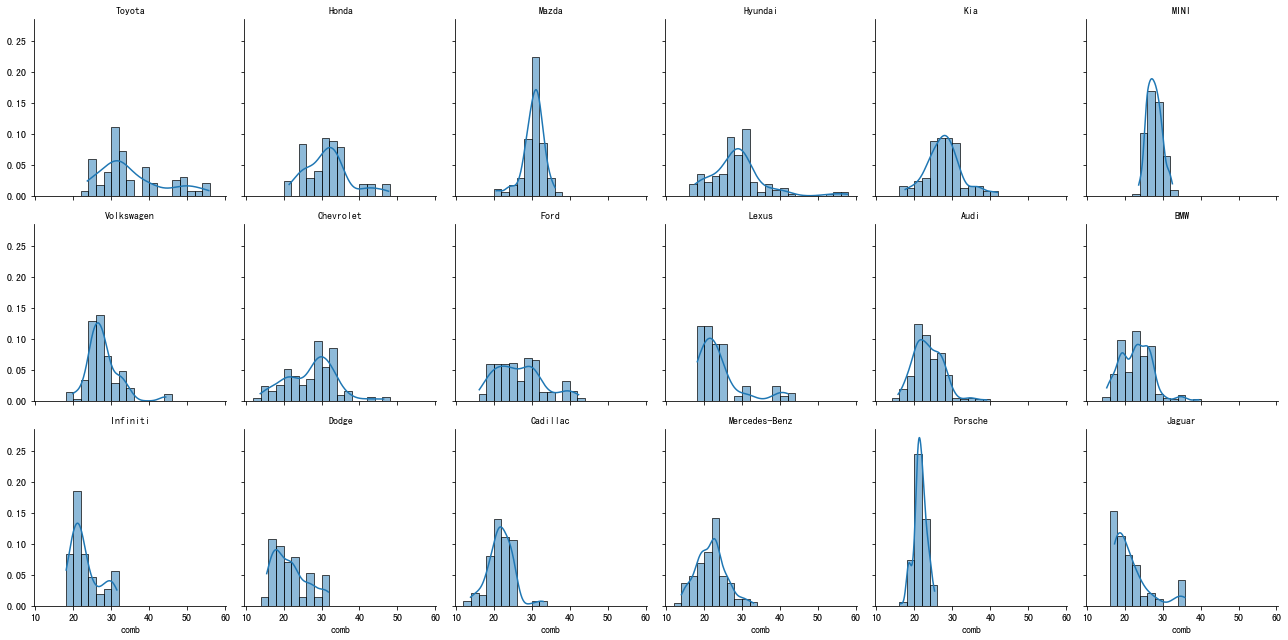

In [30]:
# 下面是通过sns.displot方法，显示kde曲线
g = sns.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 3,
                 col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(sns.histplot, 'comb', stat='density', kde=True, bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')